In [5]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest
from pyod.models.dif import DIF
from pyod.models.loda import LODA
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score



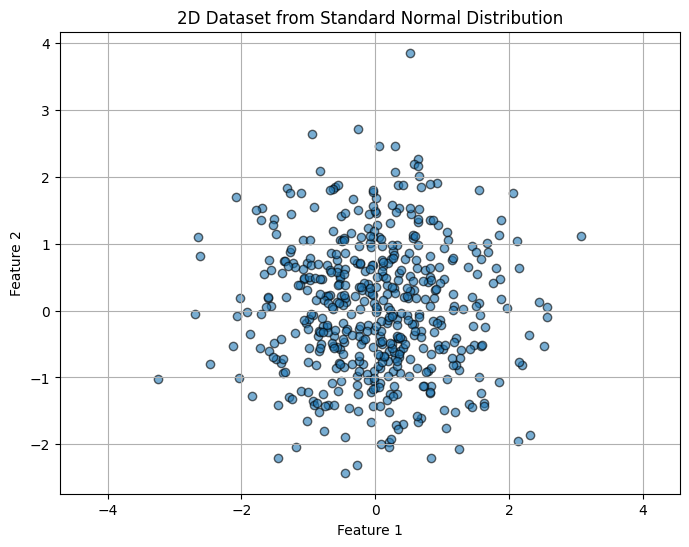

In [6]:
X,y = make_blobs(n_samples=500, centers=[[0, 0]], cluster_std=1.0, random_state=42)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, edgecolors='k')
plt.title('2D Dataset from Standard Normal Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')
plt.grid()
plt.show()

[[-0.6192972  -0.83939612]
 [-2.25535323  1.19408576]
 [-0.53381599  1.77988896]
 [-1.32560312  1.22708385]
 [-1.21751715  1.01484292]]
Anomaly Scores for each sample:
[0.259 0.365 0.311 0.129 0.353 0.384 0.129 0.223 0.138 0.26  0.356 0.366
 0.337 0.382 0.373 0.271 0.332 0.363 0.278 0.262 0.253 0.319 0.308 0.094
 0.303 0.276 0.203 0.32  0.364 0.382 0.37  0.149 0.297 0.129 0.212 0.37
 0.223 0.184 0.271 0.364 0.356 0.337 0.382 0.127 0.167 0.37  0.235 0.361
 0.381 0.381 0.379 0.135 0.223 0.37  0.088 0.332 0.347 0.311 0.377 0.357
 0.312 0.377 0.301 0.234 0.183 0.271 0.259 0.308 0.267 0.352 0.384 0.364
 0.263 0.37  0.109 0.337 0.273 0.364 0.292 0.37  0.381 0.386 0.129 0.122
 0.356 0.216 0.373 0.297 0.123 0.276 0.312 0.301 0.344 0.096 0.29  0.112
 0.357 0.364 0.384 0.204 0.296 0.133 0.254 0.364 0.344 0.367 0.271 0.207
 0.112 0.364 0.352 0.179 0.271 0.311 0.239 0.345 0.377 0.238 0.328 0.308
 0.37  0.343 0.138 0.216 0.32  0.344 0.344 0.32  0.183 0.386 0.191 0.332
 0.37  0.367 0.216 0.273 0.218

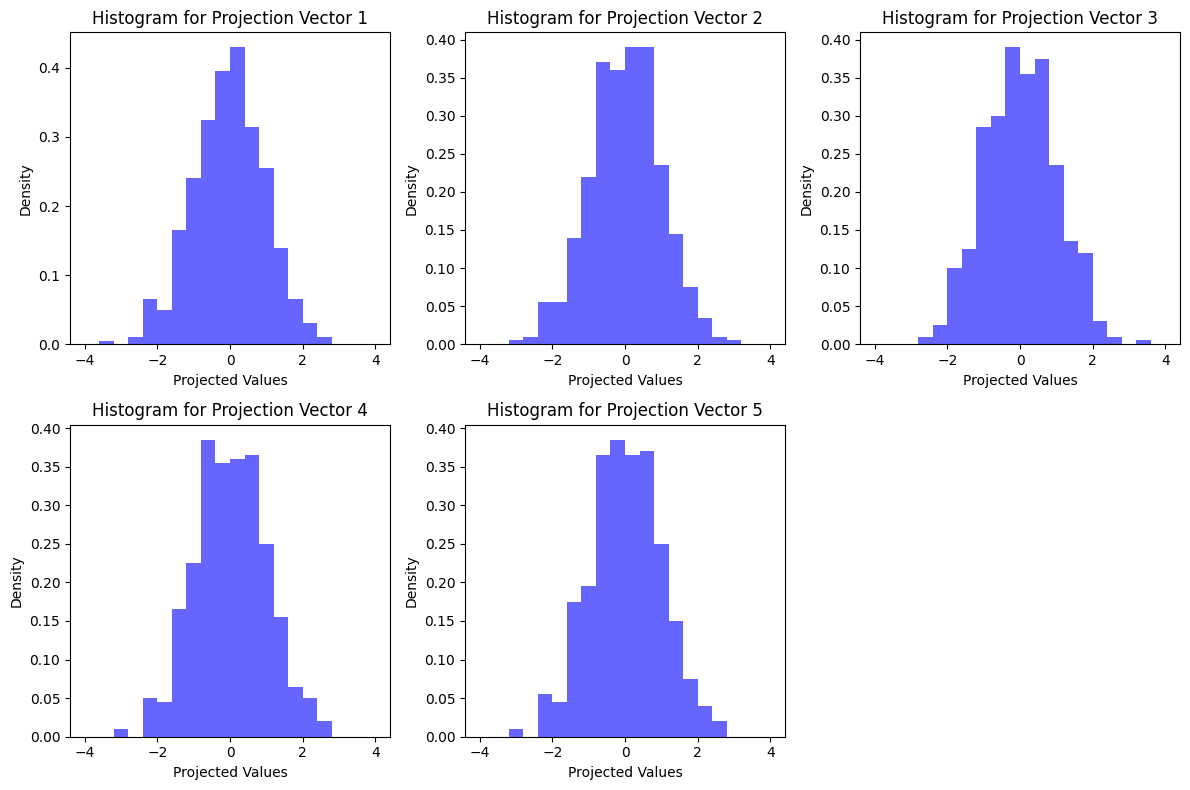

In [7]:


n_vectors = 5
mean = np.array([0, 0])
cov = np.eye(2)

projection_vectors = np.random.multivariate_normal(mean, cov, n_vectors)
print(projection_vectors)
projection_vectors = projection_vectors / np.linalg.norm(projection_vectors, axis=1)[:, np.newaxis]

projections = np.dot(X, projection_vectors.T)

histograms = []
bin_edges = np.linspace(-4, 4, 21)
for proj in projections.T:
    hist, _ = np.histogram(proj, bins=bin_edges, density=True)
    histograms.append(hist)

probabilities = np.array(histograms)

sample_probabilities = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    for j in range(n_vectors):
        bin_idx = np.digitize(projections[i, j], bin_edges) - 1
        if 0 <= bin_idx < len(probabilities[j]):
            sample_probabilities[i] += probabilities[j][bin_idx]

sample_probabilities /= n_vectors

print("Anomaly Scores for each sample:")
print(sample_probabilities)

plt.figure(figsize=(12, 8))
for i, proj in enumerate(projections.T):
    plt.subplot(2, 3, i + 1)
    plt.hist(proj, bins=bin_edges, density=True, alpha=0.6, color='blue')
    plt.title(f'Histogram for Projection Vector {i + 1}')
    plt.xlabel('Projected Values')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


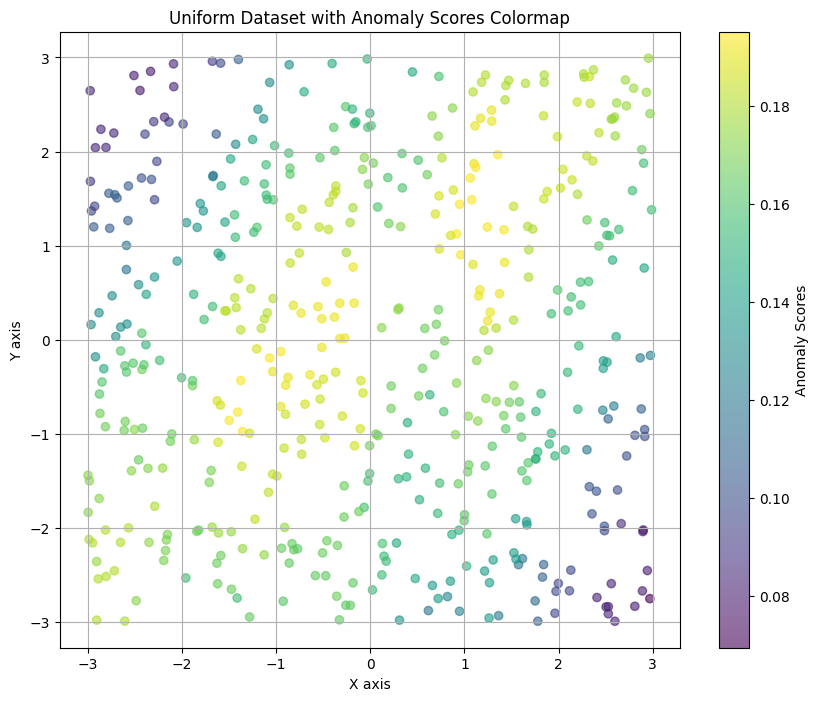

In [8]:

n_samples = 500
X_uniform = np.random.uniform(-3, 3, size=(n_samples, 2))

n_vectors = 5
mean = np.array([0, 0])
cov = np.eye(2)

projection_vectors = np.random.multivariate_normal(mean, cov, n_vectors)
projection_vectors = projection_vectors / np.linalg.norm(projection_vectors, axis=1)[:, np.newaxis]

projections_uniform = np.dot(X_uniform, projection_vectors.T)

def compute_and_plot_anomaly_scores(bin_count=20):
  histograms_uniform = []
  bin_edges = np.linspace(-4, 4, bin_count+1)
  for proj in projections_uniform.T:
      hist, _ = np.histogram(proj, bins=bin_edges, density=True)
      histograms_uniform.append(hist)

  probabilities_uniform = np.array(histograms_uniform)

  sample_probabilities_uniform = np.zeros(X_uniform.shape[0])
  for i in range(X_uniform.shape[0]):
      for j in range(n_vectors):
          bin_idx = np.digitize(projections_uniform[i, j], bin_edges) - 1
          if 0 <= bin_idx < len(probabilities_uniform[j]):
              sample_probabilities_uniform[i] += probabilities_uniform[j][bin_idx]

  sample_probabilities_uniform /= n_vectors

  plt.figure(figsize=(10, 8))
  sc = plt.scatter(X_uniform[:, 0], X_uniform[:, 1], c=sample_probabilities_uniform, cmap='viridis', alpha=0.6)
  plt.colorbar(sc, label='Anomaly Scores')
  plt.title('Uniform Dataset with Anomaly Scores Colormap')
  plt.xlabel('X axis')
  plt.ylabel('Y axis')
  plt.axis('equal')
  plt.grid()
  plt.show()
compute_and_plot_anomaly_scores(bin_count=10)

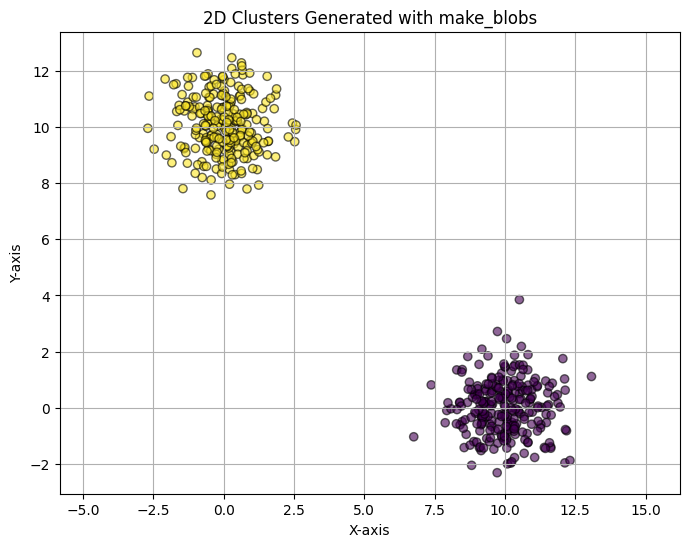

In [9]:
n_samples = 500
centers = [[10, 0], [0, 10]]
cluster_std = 1.0

X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6, edgecolors='k')
plt.title('2D Clusters Generated with make_blobs')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.grid()
plt.show()

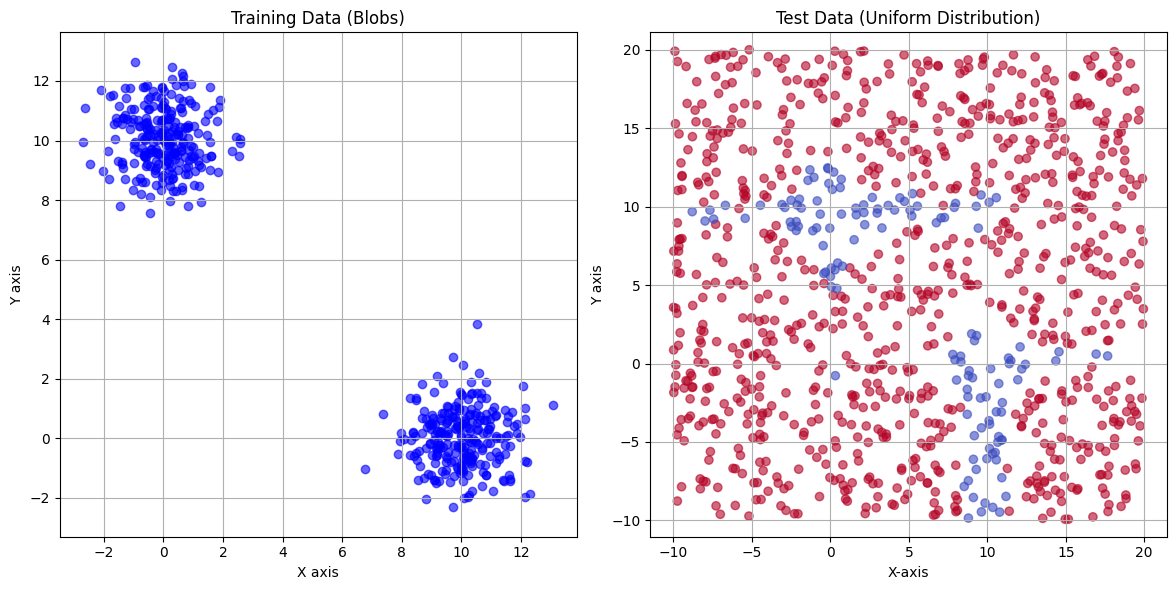

Predicted Anomalies in Test Data: 870


In [10]:

n_samples = 500
centers = [[10, 0], [0, 10]]
cluster_std = 1.0

X_train, y_train = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

contamination = 0.02
model = IForest(contamination=contamination)
model.fit(X_train)

n_test_samples = 1000
X_test = np.random.uniform(-10, 20, size=(n_test_samples, 2))

y_test_scores = model.decision_scores_
y_test_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', alpha=0.6, label='Training Data')
plt.title('Training Data (Blobs)')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.axis('equal')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='coolwarm', alpha=0.6, label='Test Data')
plt.title('Test Data (Uniform Distribution)')
plt.xlabel('X-axis')
plt.ylabel('Y axis')
plt.axis('equal')
plt.grid()

plt.tight_layout()
plt.show()

print("Predicted Anomalies in Test Data:", np.sum(y_test_pred))


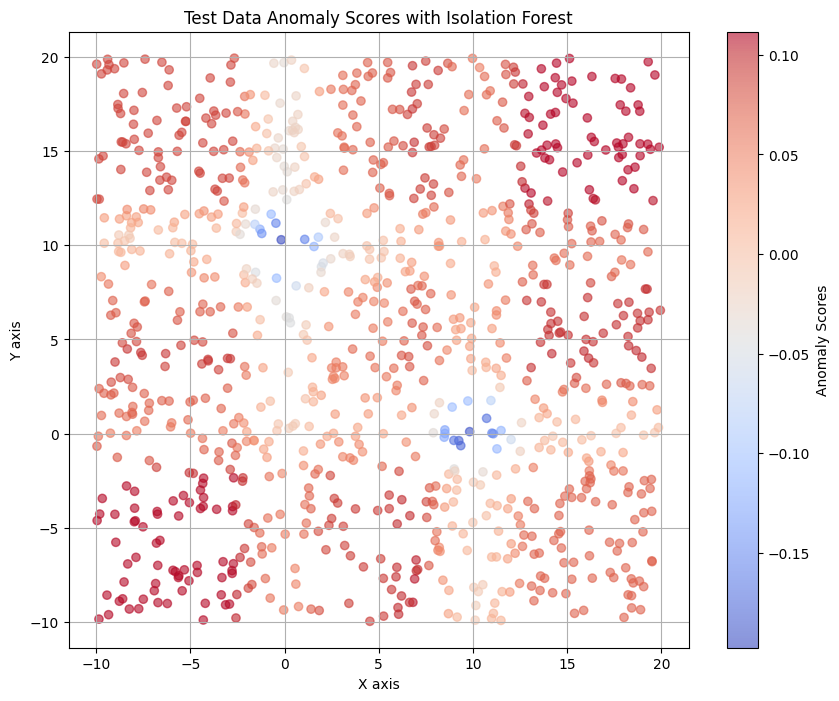

In [11]:

n_samples = 500
centers = [[10, 0], [0, 10]]
cluster_std = 1.0

X_train, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

model = IForest(contamination=0.02)
model.fit(X_train)

n_test_samples = 1000
X_test = np.random.uniform(-10, 20, size=(n_test_samples, 2))

y_test_scores = model.decision_scores_
y_test_pred = model.predict(X_test)

test_anomaly_scores = model.decision_function(X_test)

plt.figure(figsize=(10, 8))
sc = plt.scatter(X_test[:, 0], X_test[:, 1], c=test_anomaly_scores, cmap='coolwarm', alpha=0.6)
plt.colorbar(sc, label='Anomaly Scores')
plt.title('Test Data Anomaly Scores with Isolation Forest')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.axis('equal')
plt.grid()
plt.show()


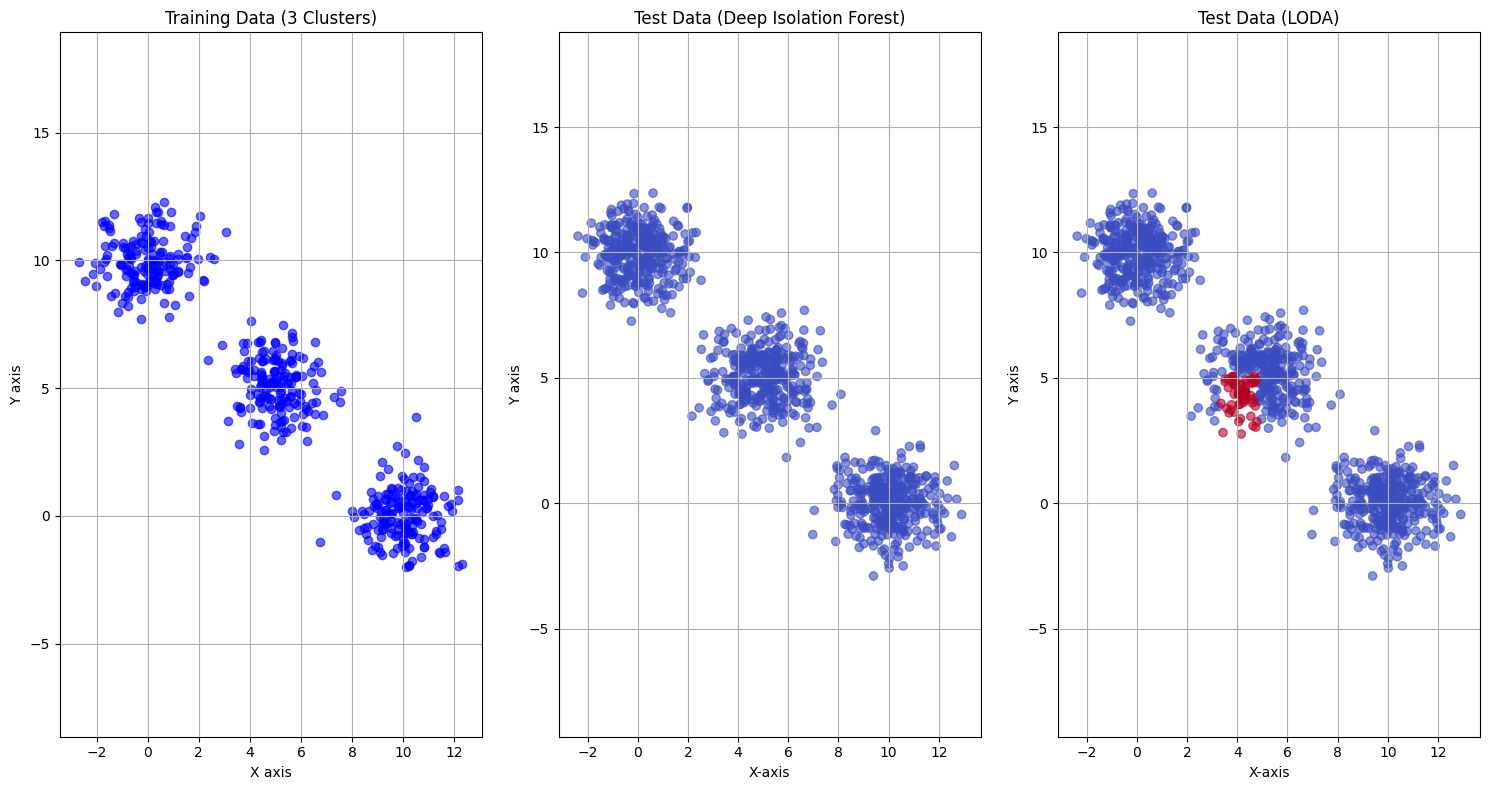

Predicted Anomalies in Test Data (DIF): 0
Predicted Anomalies in Test Data (LODA): 63


In [12]:


n_samples = 500
centers = [[10, 0], [0, 10], [5, 5]]  # Three cluster centers
cluster_std = 1.0

X_train, y_train = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

n_test_samples = 1000
X_test, _ = make_blobs(n_samples=n_test_samples, centers=centers, cluster_std=cluster_std, random_state=43)

iforest_model = IForest(contamination=0.02)
iforest_model.fit(X_train)
y_test_iforest_pred = iforest_model.predict(X_test)

deep_iforest_model = DIF()
deep_iforest_model.fit(X_train)
y_test_deep_iforest_scores = deep_iforest_model.decision_function(X_test)
y_test_deep_iforest_pred = deep_iforest_model.predict(X_test)

loda_model = LODA()
loda_model.fit(X_train)
y_test_loda_scores = loda_model.decision_function(X_test)
y_test_loda_pred = loda_model.predict(X_test)

plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', alpha=0.6, label='Training Data')
plt.title('Training Data (3 Clusters)')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.axis('equal')
plt.grid()

plt.subplot(1, 3, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_deep_iforest_pred, cmap='coolwarm', alpha=0.6, label='Test Data (DIF)')
plt.title('Test Data (Deep Isolation Forest)')
plt.xlabel('X-axis')
plt.ylabel('Y axis')
plt.axis('equal')
plt.grid()

plt.subplot(1, 3, 3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_loda_pred, cmap='coolwarm', alpha=0.6, label='Test Data (LODA)')
plt.title('Test Data (LODA)')
plt.xlabel('X-axis')
plt.ylabel('Y axis')
plt.axis('equal')
plt.grid()

plt.tight_layout()
plt.show()

print("Predicted Anomalies in Test Data (DIF):", np.sum(y_test_deep_iforest_pred))
print("Predicted Anomalies in Test Data (LODA):", np.sum(y_test_loda_pred))


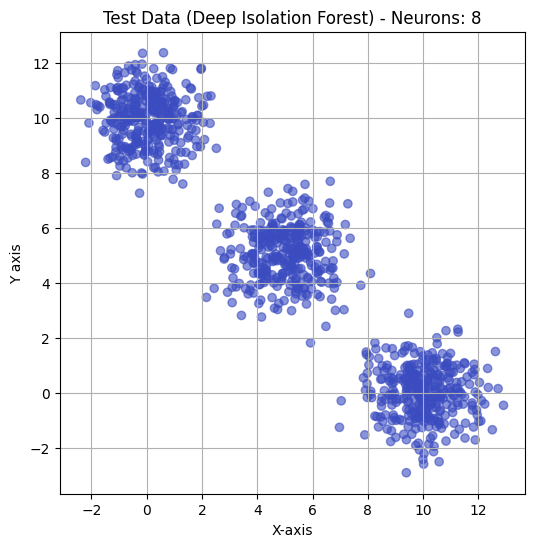

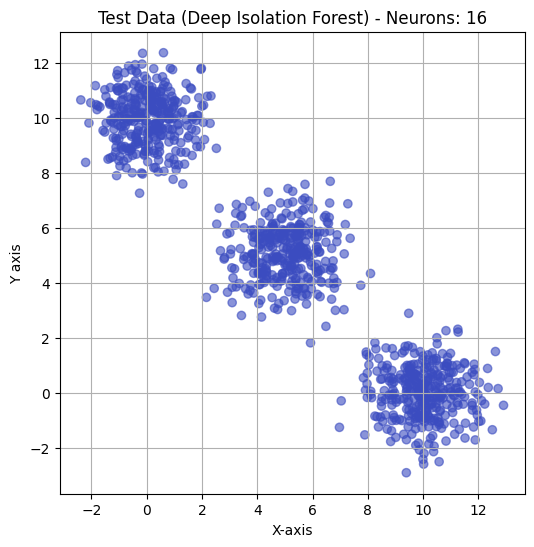

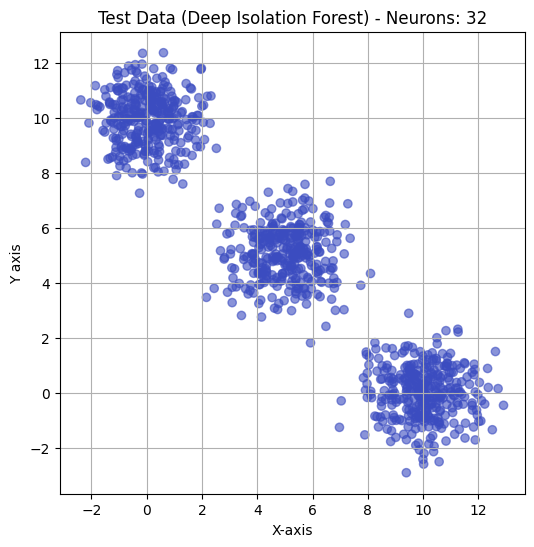

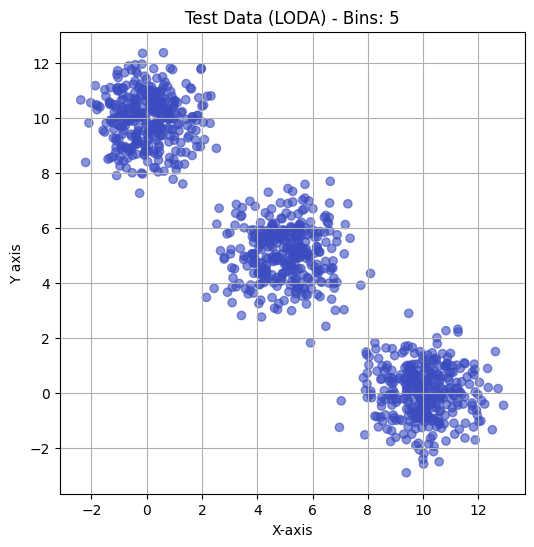

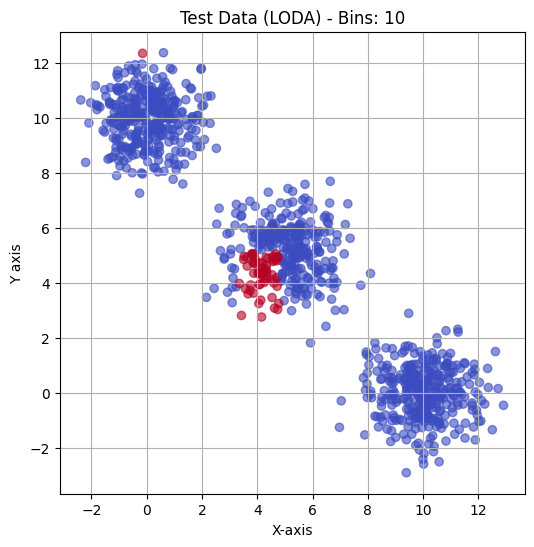

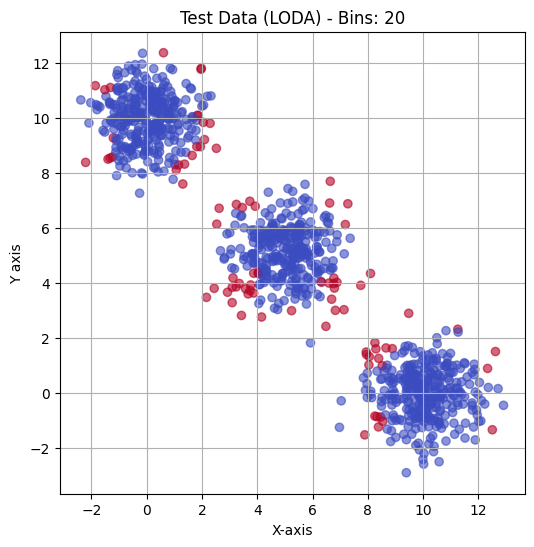

In [14]:
neurons = [8, 16, 32]
for n in neurons:
    deep_iforest_model = DIF(hidden_neurons=(n, n))
    deep_iforest_model.fit(X_train)
    y_test_deep_iforest_pred = deep_iforest_model.predict(X_test)

    plt.figure(figsize=(6, 6))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_deep_iforest_pred, cmap='coolwarm', alpha=0.6)
    plt.title(f'Test Data (Deep Isolation Forest) - Neurons: {n}')
    plt.xlabel('X-axis')
    plt.ylabel('Y axis')
    plt.axis('equal')
    plt.grid()
    plt.show()

bin_counts = [5, 10, 20]
for bins in bin_counts:
    loda_model = LODA(n_bins=bins)
    loda_model.fit(X_train)
    y_test_loda_pred = loda_model.predict(X_test)

    plt.figure(figsize=(6, 6))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_loda_pred, cmap='coolwarm', alpha=0.6)
    plt.title(f'Test Data (LODA) - Bins: {bins}')
    plt.xlabel('X-axis')
    plt.ylabel('Y axis')
    plt.axis('equal')
    plt.grid()
    plt.show()

In [24]:
file_path = '/content/sample_data/shuttle.mat'

data = scipy.io.loadmat(file_path)
X = data['X']
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled Training Data (first 5 rows):")
print(X_train_scaled[:5])

print("Scaled Testing Data (first 5 rows):")
print(X_test_scaled[:5])

Scaled Training Data (first 5 rows):
[[-7.35236857e-02  1.56563224e-03  1.89626759e+00 -1.01448860e-02
   4.48997939e-01  8.60315267e-03  1.40108601e+00  3.74884919e-01
  -4.27535253e-01]
 [-7.71913087e-01  1.56563224e-03  2.34592398e+00  7.16864536e-02
  -5.43295827e-01  3.66367436e-02  2.29515310e+00  1.53168669e+00
   7.52425862e-02]
 [ 6.24865716e-01  5.41904548e-02  9.76420492e-02  9.89635668e-02
   8.45915446e-01 -7.41604213e-03 -5.36059355e-01 -7.81916855e-01
  -3.43738947e-01]
 [ 4.69668071e-01  1.56563224e-03  9.76420492e-02 -3.74219992e-02
   8.45915446e-01 -7.41604213e-03 -4.61553764e-01 -7.81916855e-01
  -4.27535253e-01]
 [ 1.59272782e-01  1.56563224e-03 -9.14084819e-01 -1.01448860e-02
   6.47456693e-01  3.66367436e-02 -6.85070537e-01 -9.74717151e-01
  -4.27535253e-01]]
Scaled Testing Data (first 5 rows):
[[ 5.47266894e-01  1.56563224e-03 -4.64428433e-01 -1.46530452e-01
   8.45915446e-01 -7.41604213e-03 -8.34081718e-01 -1.02291722e+00
  -4.27535253e-01]
 [ 1.59272782e-01  1

In [ ]:
models = {
    'IForest': IForest(),
    'LODA': LODA(),
    'DIF': DIF()
}

ba_scores = {'IForest': [], 'LODA': [], 'DIF': []}
roc_auc_scores = {'IForest': [], 'LODA': [], 'DIF': []}

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train_scaled)
        y_pred = model.predict(X_test_scaled)
        ba = balanced_accuracy_score(y_test, y_pred)
        ba_scores[model_name].append(ba)

        try:
            y_pred_prob = model.decision_function(X_test_scaled)
            roc_auc = roc_auc_score(y_test, y_pred_prob)
            roc_auc_scores[model_name].append(roc_auc)
        except AttributeError:
            print(f"Warning: {model_name} does not support ROC AUC calculation")

mean_ba_scores = {model_name: np.mean(scores) for model_name, scores in ba_scores.items()}
mean_roc_auc_scores = {model_name: np.mean(scores) for model_name, scores in roc_auc_scores.items()}

print("Mean Balanced Accuracy (BA) scores:")
for model_name, score in mean_ba_scores.items():
    print(f"{model_name}: {score:.4f}")

print("\nMean ROC AUC scores:")
for model_name, score in mean_roc_auc_scores.items():
    print(f"{model_name}: {score:.4f}")